In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

**Moore-Penrose** pseudoinverese is helpful as most matrices in ml are non square

## Regression
fx : $y = Xw$ 
- $y$ = target variable to predict
- $X$= matrix which contains all the features
- $w$ = is vector of wieghts for features in X

on solving the eqn $y=Xw$ assuming $X^-1$ exists, we get,

Xw = y  
X<sup>-1</sup> Xw = X<sup>-1</sup>y  
I<sub>n</sub>w = X<sup>-1</sup>y    
***w = X<sup>-1</sup>y***  

in non-square X, X<sup>-1</sup> will be $X^+$ or pseudoinverse of X

In [2]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [3]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

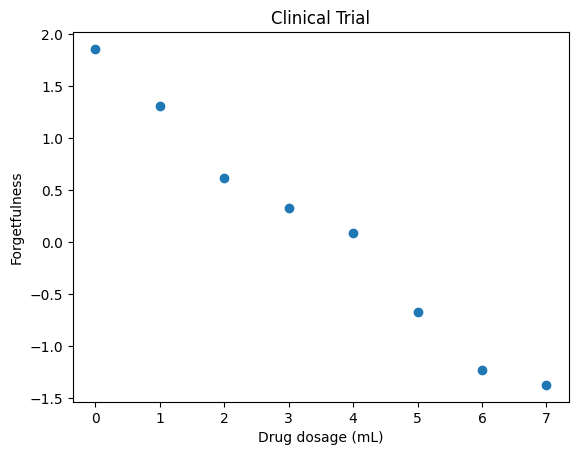

In [4]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to `1` across the board:

y intercept is the value/point of where line intersects y-axis and x = 0

In [15]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

From the slides, we know that we can calculate the weights $w$ using the equation $w = X^+y$: 



In [16]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

to plot line we need to get the eqn of line which is given by:  
$y = mx + b$, where $y$ is line eqn, $m$ is slope and $b$ is y-intercept (a point where line intersects y-axis or where x becomes 0)

from above $w$ which we get by fx: `pinv(X).y`  
w[0][0] = y-intercept or $b$  
w[0][1] = slope of line or $m$

In [17]:
b = np.asarray(w).reshape(-1)[0]
b # y-intercept

1.7599999999999985

In [21]:
m = np.asarray(w).reshape(-1)[1]
m # slope of line

-0.4692857142857139

With the weights we can plot the line to confirm it fits the points: 

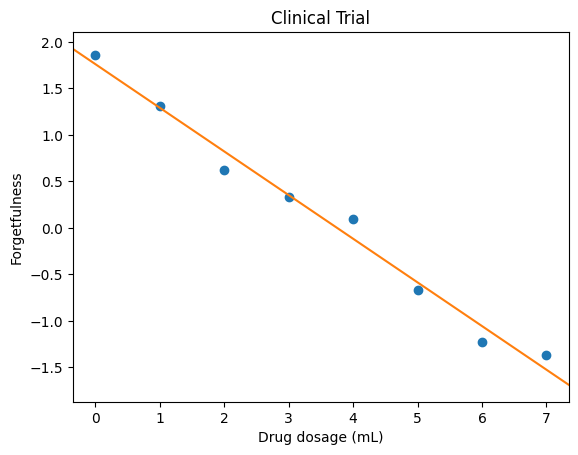

In [20]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')